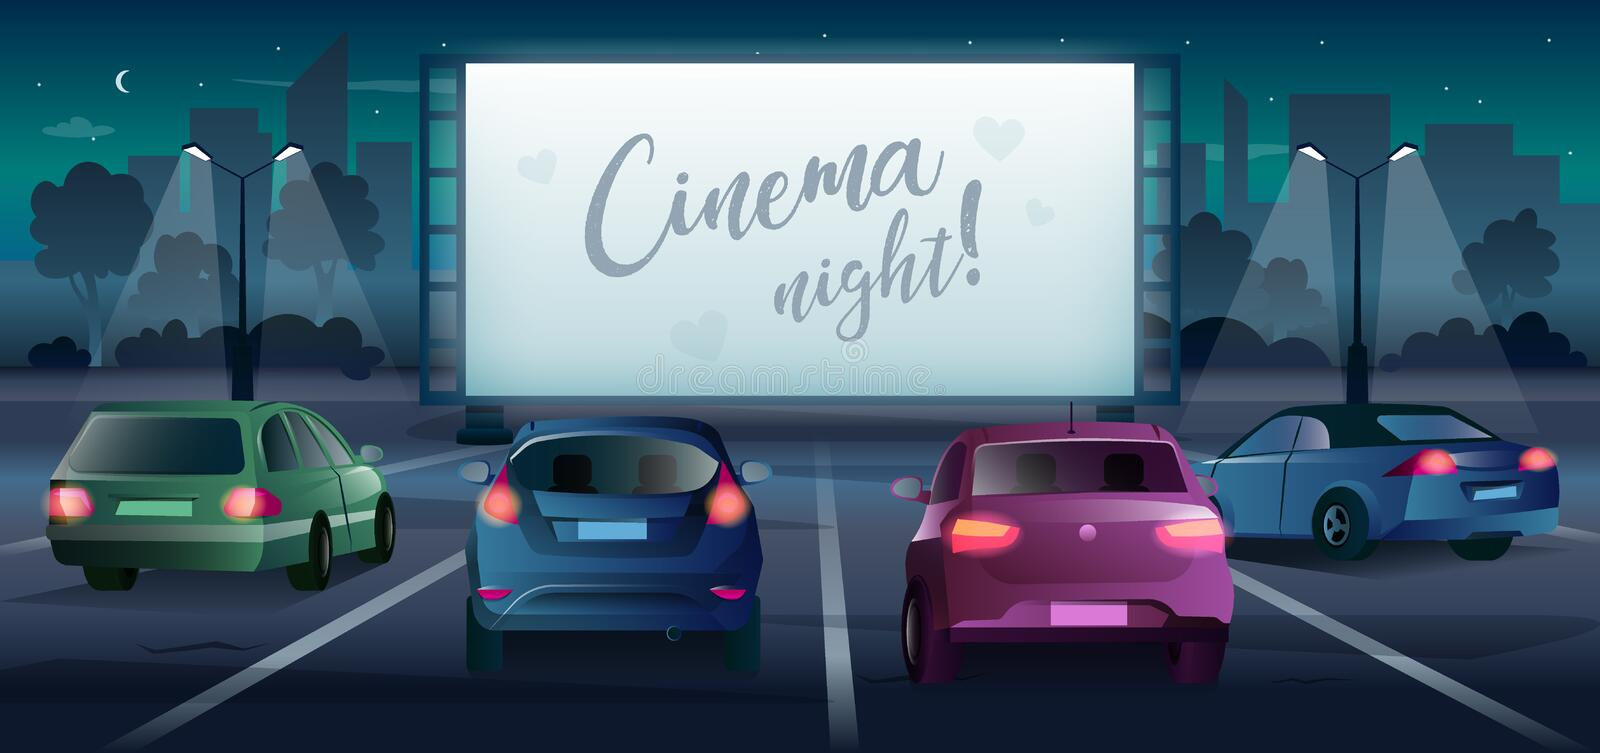

# Microsoft Movie Studios Pitch

**Authors:** Leo Schell Villanueva, Russell Blanchard, Jake Swecker, Beyza Ulasti

## Overview

The folks over at Microsoft have decided to throw their hat into the ring and the movie business will never be the same. They've come to us to figure out their pivotal first moves, luckily we are up to the task and have the data to prove it. This project is a repository of our thoughts and opinions on where to go from here using the cleanest and most recent data available. We've used over three data sets meticulously cleaned and trimmed to show off three different options for the executives to take. We looked at the most profitable movies per dollar, the highest grossing, and how genre and producers can affect all. We've come to the conclusion that the best choice to create a movie studio would be to focus on Action / Adventure films, based on an existing IP, with seasoned producers, and released in Q1 or Q2 will deliver the most return

## Business Problem

Microsoft wants to create a new studio to finally and only now at it's peak really capture the market on the movie industry, they want to know what type of films to focus on. To solve that for them, we've analyzed domestic and foreign gross, measured the profitability on rate of return per dollar spent, and how genre and rating factor in to finanical success.

## Bottom Line
    
    1. Ip is King
    2. Action and Adventure 
    3. Seasoned Producers
    4. Q1 or Q2 Release

## Data Understanding

The data that we used in our analysis was from https://www.imdb.com/, https://www.themoviedb.org/, and https://www.the-numbers.com/. These files provided movie metrics from everything from release dates, genre, box office gross, and countless other facets and avenues that we could've tread to support and cement our findings. It primarily contains numerical data, and categorical subsets. Through some careful cleaning and parsing we could ascertain what movies were the most popular, made the highest box office gross, and when they were released.

In [2]:
##### Importing Modules #####

import os
os.chdir ('/Users/Jake/Documents/Flatiron/projectfinal/Microsoft-Pitch')
import pandas as pd
import sqlite3
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sb

##### Cleaning Up Budget Data #####
df = pd.read_csv('C:/Users/Jake/Documents/Flatiron/projectfinal/Microsoft-Pitch/zippedData/tn.movie_budgets.csv.gz')

##### Dropping Unused Columns #####
df.drop(df.domestic_gross.name, axis=1, inplace=True)
df.drop(df.id.name, axis=1, inplace=True)

##### Cleaning Up the Numbers and Converting them #####
df['worldwide_gross'] = df['worldwide_gross'].astype(str)
df['production_budget'] = df['production_budget'].astype(str)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df.worldwide_gross = pd.to_numeric(df.worldwide_gross, errors='coerce')
df.production_budget = pd.to_numeric(df.production_budget, errors='coerce')

##### Renaming Columns #####
df = df.rename(columns={'production_budget': 'Budget', 'worldwide_gross': 'Total Gross', 'movie': 'Title', 'release_date': 'Year'})
df['Year'] = pd.to_datetime(df['Year'])
df['Released'] = df['Year'].dt.year
df.drop(df.Year.name, axis=1, inplace=True)
##### Sorting into top 10 #####
df= df.loc[df['Total Gross'] >=1034727750]
df = df.loc[df["Released"] >=2017 ]
df.sort_values(['Total Gross'], ascending=[False])
df.sort_values(['Total Gross'], ascending=[0], inplace=True)

In [14]:

# USE movies_raw dataframe when you want to analyze budgets/gross of any genre other than action/adventure
movies_raw = pd.read_csv('C:/Users/Jake/Documents/Flatiron/projectfinal/Microsoft-Pitch/Main Database/all_genres_vs_budgets.csv')
movies_raw.head()

# producers SOLELY contains ACTION/ADVENTURE PRODUCERS
producers = pd.read_csv('C:/Users/Jake/Documents/Flatiron/projectfinal/Microsoft-Pitch/notebooks/producers.csv')


#MAIN DATABASE = movies_primary
#this is really only useful for producer analysis
movies_primary = movies_raw.merge(producers,
                          left_on='movie',
                          right_on = 'primary_title',
                          how ='inner')

movies_primary = movies_primary[['movie', 'production_budget', 'worldwide_gross', 'release_month', 'release_year_x', 'genre_ids', 'primary_name', 'movie_id']]
movies_primary = movies_primary.rename(columns = {'release_year_x': 'release_year', 'primary_name': 'producer'})
action = movies_raw[(movies_raw['worldwide_gross'] > 0)]
action = action[(action['genre_ids'].str.contains("12")) | (action['genre_ids'].str.contains("28"))]
action = action[(~action["genre_ids"].str.contains('10751'))]
action = action[(~action["genre_ids"].str.contains('16'))]
action['profit'] = action['worldwide_gross'] - action['production_budget']
###### Analyzing successful producers ######

movies_primary.head()

,movie,production_budget,worldwide_gross,release_month,release_year,genre_ids,producer,movie_id
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Kathleen Kennedy,tt2527336
1,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Ram Bergman,tt2527336
2,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",Kathleen Kennedy,tt3778644
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",Simon Emanuel,tt3778644
4,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]",Neal H. Moritz,tt4630562


In [20]:
##### Figuring out the most popular genres #####

tmdb=pd.read_csv('C:/Users/Jake/Documents/Flatiron/projectfinal/Microsoft-Pitch/zippedData/tmdb.movies.csv.gz', skipinitialspace=True)
tmdb.sort_values(by='release_date', inplace=True)
del tmdb['Unnamed: 0']
del tmdb['original_language']
del tmdb['vote_count']
del tmdb['original_title']
del tmdb['vote_average']
del tmdb['id']
tmdb=tmdb.loc[(tmdb['release_date'] >= '2016-01-01')
                     & (tmdb['release_date'] < '2019-12-30')]
tmdb.sort_values(by='popularity',ascending=False,inplace=True)
tmdb=tmdb.head(-8937)
tmdb = tmdb[['title', 'release_date', 'popularity']]
tmdb.columns = tmdb.columns.str.title() 
tmdb.rename(columns={"Release_Date" : "Release Date"}, inplace=True)
tmdb.drop_duplicates(subset=['Title'], keep='last')

###### Printing Out the Top 10 Most Popular Films #####

tmdb.head(10)


,Title,Release Date,Popularity
23811,Avengers: Infinity War,2018-04-27,80.773
23812,Spider-Man: Into the Spider-Verse,2018-12-14,60.534
23813,Blade Runner 2049,2017-10-06,48.571
20617,Blade Runner 2049,2017-10-06,48.571
23814,Fantastic Beasts: The Crimes of Grindelwald,2018-11-16,48.508
23815,Ralph Breaks the Internet,2018-11-21,48.057
20618,Spider-Man: Homecoming,2017-07-07,46.775
20619,John Wick: Chapter 2,2017-02-10,45.253
20620,Logan,2017-03-03,45.000
23816,Ant-Man and the Wasp,2018-07-06,44.729


In [16]:
##### Printing out the top grossing films ####

movies_gross = movies_raw.sort_values(by=['worldwide_gross'], ascending= False)
movies_gross = movies_gross.head(10)
movies_gross = movies_gross[['movie', 'worldwide_gross']]
movies_gross

,movie,worldwide_gross
1,Avengers: Infinity War,2048134200
9,Black Panther,1348258224
0,Star Wars: The Last Jedi,1316721747
30,Jurassic World: Fallen Kingdom,1305772799
34,Beauty and the Beast,1259199706
10,Incredibles 2,1242520711
6,The Fate of the Furious,1234846267
35,Aquaman,1146894640
4,Captain America: Civil War,1140069413
11,Rogue One: A Star Wars Story,1049102856


In [17]:
movies_raw.head()

,movie,production_budget,worldwide_gross,release_month,release_year_x,genre_ids
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]"
1,Avengers: Infinity War,300000000,2048134200,4,2018,"[12, 28, 14]"
2,Justice League,300000000,655945209,11,2017,"[28, 12, 14, 878]"
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]"
4,Captain America: Civil War,250000000,1140069413,5,2016,"[12, 28, 878]"


In [18]:
movies_raw.describe()

,production_budget,worldwide_gross,release_month,release_year_x
count,4.410000e+02,4.410000e+02,441.000000,441.000000
mean,4.939854e+07,1.695799e+08,6.643991,2016.927438
std,5.908162e+07,2.740775e+08,3.539744,0.855036
min,3.000000e+04,0.000000e+00,1.000000,2016.000000
25%,1.000000e+07,1.287492e+07,3.000000,2016.000000
50%,2.700000e+07,5.959675e+07,7.000000,2017.000000
75%,6.000000e+07,1.904531e+08,10.000000,2018.000000
max,3.170000e+08,2.048134e+09,12.000000,2019.000000


## Results

In [19]:
df

,Title,Budget,Total Gross,Released
6,Avengers: Infinity War,300000000,2048134200,2018
41,Black Panther,200000000,1348258224,2018
4,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,2017
112,Jurassic World: Fallen Kingdom,170000000,1305772799,2018
134,Beauty and the Beast,160000000,1259199706,2017
43,Incredibles 2,200000000,1242520711,2018
22,The Fate of the Furious,250000000,1234846267,2017
135,Aquaman,160000000,1146894640,2018
95,Captain Marvel,175000000,1123061550,2019
629,Despicable Me 3,75000000,1034727750,2017


In [21]:
tmdb.head(10)

,Title,Release Date,Popularity
23811,Avengers: Infinity War,2018-04-27,80.773
23812,Spider-Man: Into the Spider-Verse,2018-12-14,60.534
23813,Blade Runner 2049,2017-10-06,48.571
20617,Blade Runner 2049,2017-10-06,48.571
23814,Fantastic Beasts: The Crimes of Grindelwald,2018-11-16,48.508
23815,Ralph Breaks the Internet,2018-11-21,48.057
20618,Spider-Man: Homecoming,2017-07-07,46.775
20619,John Wick: Chapter 2,2017-02-10,45.253
20620,Logan,2017-03-03,45.000
23816,Ant-Man and the Wasp,2018-07-06,44.729


In [9]:
movies_primary.head()

,movie,production_budget,worldwide_gross,release_month,release_year,genre_ids,producer,movie_id
0,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Kathleen Kennedy,tt2527336
1,Star Wars: The Last Jedi,317000000,1316721747,12,2017,"[14, 12, 878, 28]",Ram Bergman,tt2527336
2,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",Kathleen Kennedy,tt3778644
3,Solo: A Star Wars Story,275000000,393151347,5,2018,"[28, 12, 878]",Simon Emanuel,tt3778644
4,The Fate of the Furious,250000000,1234846267,4,2017,"[28, 80, 53]",Neal H. Moritz,tt4630562


### Limitations

1. This data has not been adjusted for inflation
2. Some of the data was polluted
3. Missing Data

### Data Visualization

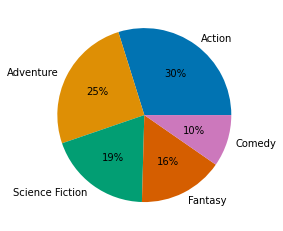

In [10]:
##### This chart represents the most popular genres #####

data = [34, 29, 22, 18, 11]
keys = ['Action', 'Adventure', 'Science Fiction', 'Fantasy', 'Comedy']
palette_color = sb.color_palette('colorblind')
plt.pie(data, labels=keys, colors=palette_color,autopct='%.0f%%')
plt.show()

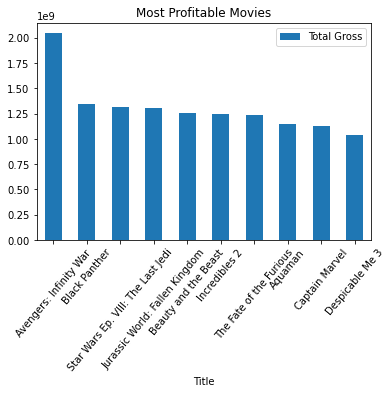

In [11]:
##### This Graph Represents the Most Profitable Movies #####

df.plot.bar(x="Title", y="Total Gross", rot=50, title="Most Profitable Movies");
plt.show(block=True);

Text(0, 0.5, 'Gross')

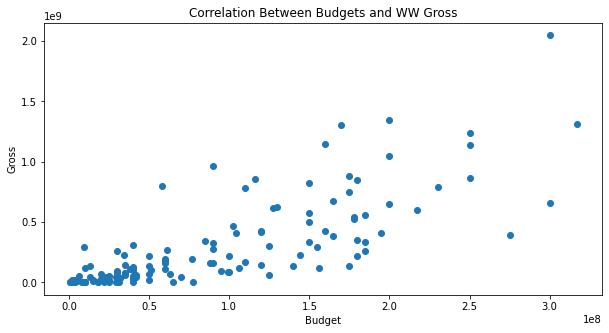

In [12]:
#### This Chart Represents Budget/Gross Correlation ####

x = action['production_budget']
y = action['worldwide_gross']
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x,y)
ax.set_title('Correlation Between Budgets and WW Gross')
ax.set_xlabel('Budget')
ax.set_ylabel('Gross')

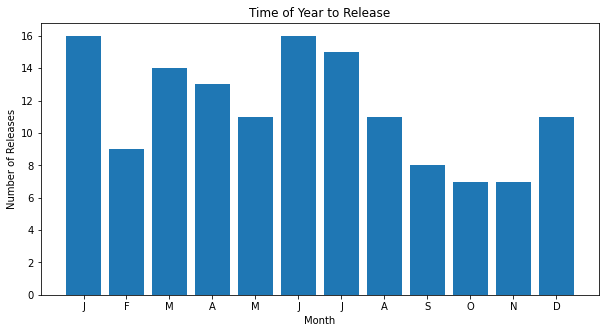

In [13]:
x = action['release_month'].value_counts().sort_index().index
y = action['release_month'].value_counts().sort_index().values
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Time of Year to Release')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Releases')
ax.set_xticks(range(1,13))
ax.set_xticklabels(list('JFMAMJJASOND'));

## Conclusions and Recommendations

1. Create a movie based on existing Intellectual Property. It may not lend itself to artistry but the data doesn't lie, people like things they've seen before, it pulls in a massive pre-populated audience and creates a feedback loop on the existing property, synergy.

2. Focus on the Action and Adventure Genre. This genre of movie has been consistently the most popular with almost an 100% stranglehold on top box office gross and they have the largest audience and can appeal to multiple generations.

3. Hire the right people for the job. Producers matter, we need to people that understand how to successfuly adapt a pre-existing property into a cinematic format.
    
4. Release in Q1 or Q2. Movies released in these quarters profited the most.
 

## Next Steps

1. Look into Merchandising
2. Sequel Data
3. Digital Streaming
4. Embedded Marketing of Microsoft Technologies.